In [1]:
import sys
sys.path.append("..")


In [2]:
import data_set_price.data_collect as data_collect
import matplotlib.pyplot as plt
import yfinance

stock_id_list=["AAPL","NVDA","AMD"]
path_dataset_long="demo_data/ex3/long"
path_dataset_short="demo_data/ex3/short"

Experiment3-pred_lengths(see:Tutorial_notebook/Experiment3.ipynb):
    goal : test the performance with different pred_lengths for asset allocation.

data set:
    monthly stock prices of three stocks (from "2008-01-01" to "2018-12-01")  
    stock_id_list=["AAPL","NVDA","AMD"]
        

Process:
    0. let pred_length = x
    1. generate the historical return R according the monthly stock prices.
    2. generate prtfolio Pi according to R at time point i 
    3. predict portfolio [P(i+1),P(i+2),...,P(i+x)] according [P1,P2,....,Pi] by GPR
    4. compute the profit of Pi  Profit_Pi and the profit of the predicted p(i+1) , pred_Profit_Pi according R ,Pi and the predicted P(i+1)
    5. compute the loss score,
    
 loss score = pred_Profit_Pi - Profit_Pi
loss score > 0 means that predicted P(i+1) is better then Profit_Pi.

average predicted profit is the average pred_Profit_Pi at each time point
average actual profit is the average Profit_Pi at each time point
average score is the average score at each time point
cumulative predicted profit is the cumulative result of pred_Profit_Pi.
cumulative actual profit is the cumulative result of Profit_Pi.
 (here cumulative profit means : pred_Profit_P1 * pred_Profit_P2 * .....*pred_Profit_Pi)
average score of the cumulative result= cumulative predicted profit  - cumulative actual profit 

In [3]:
data_collect.download_data(stock_id_list,interval="1d",start="2004-01-01",
                  end="2018-12-01",
                  target_diretory=path_dataset_short,
                  back_adjust=True,auto_adjust=True)

In [4]:
data_collect.download_data(stock_id_list,interval="1mo",start="2004-01-01",
                  end="2018-12-01",
                  target_diretory=path_dataset_long,
                  back_adjust=True,auto_adjust=True)

In [5]:
import portfolios_generation
import util

D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


In [6]:
start_time = "2009-01-01 00:00:00"
end_time = "2018-01-01 00:00:00"


start=util.convert_time_into_datetime(start_time)
end=util.convert_time_into_datetime(end_time)


In [7]:
pg_long = portfolios_generation.Portfolios(path_dataset_long)
#ppp.generate_dataframe_by_time_interval_string(start=start_time, end=end_time)

In [8]:
pg_long.load_historical_price(start=start,end=end)
historical_return_long=pg_long.generate_historical_returns()


In [9]:
portfolio_long= pg_long.generate_historical_portfolios(start=start,end=end,forward_length=10)


assdsd
2009-11-01 00:00:00
mu AAPL    0.016995
AMD    -0.187279
NVDA   -0.204258
Name: 2009-10-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  2.664554  1.063304  0.760246
AMD   1.063304  7.804781  1.421385
NVDA  0.760246  1.421385  4.187303
stock_returns                 AAPL       AMD      NVDA
Date                                    
2009-02-01 -0.009099 -0.004566  0.041510
2009-03-01  0.177024  0.399083  0.190821
2009-04-01  0.197013  0.183607  0.164300
2009-05-01  0.079314  0.257618 -0.091463
2009-06-01  0.048744 -0.147577  0.082454
2009-07-01  0.147160 -0.054264  0.145262
2009-08-01  0.029500  0.191257  0.122970
2009-09-01  0.101896  0.298165  0.035124
2009-10-01  0.016995 -0.187279 -0.204258
Expected annual return: 1.7%
Annual semi-deviation: 4.8%
Sortino Ratio: -0.06
2009-12-01 00:00:00
mu AAPL    0.060530
AMD     0.523913
NVDA    0.091973
Name: 2009-11-01 00:00:00, dtype: float64
S           AAPL        AMD      NVDA
AAPL  2.552211   0.913188  0.763713
AM

mu AAPL    0.040935
AMD     0.176245
NVDA   -0.052675
Name: 2011-02-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  3.720680  0.757006  0.704589
AMD   0.757006  5.598509  0.850621
NVDA  0.704589  0.850621  8.342314
stock_returns                 AAPL       AMD      NVDA
Date                                    
2010-05-01 -0.016125 -0.055127 -0.163590
2010-06-01 -0.020827 -0.145858 -0.222983
2010-07-01  0.022741  0.023224 -0.099903
2010-08-01 -0.055005 -0.251001  0.015234
2010-09-01  0.167215  0.267380  0.251876
2010-10-01  0.060722  0.032349  0.029110
2010-11-01  0.033790 -0.006812  0.132279
2010-12-01  0.036670  0.122085  0.131521
2011-01-01  0.051960 -0.042787  0.553247
2011-02-01  0.040935  0.176245 -0.052675
Expected annual return: 12.1%
Annual semi-deviation: 100.0%
Sortino Ratio: 0.10
2011-04-01 00:00:00
mu AAPL   -0.013306
AMD    -0.066232
NVDA   -0.185349
Name: 2011-03-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  3.670823  0.79545

Expected annual return: 0.7%
Annual semi-deviation: 100.0%
Sortino Ratio: -0.01
2012-01-01 00:00:00
mu AAPL    0.059655
AMD    -0.050967
NVDA   -0.113244
Name: 2011-12-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  1.700178  0.441567 -0.036445
AMD   0.441567  2.848778  1.049977
NVDA -0.036445  1.049977  3.018873
stock_returns                 AAPL       AMD      NVDA
Date                                    
2011-03-01 -0.013306 -0.066232 -0.185349
2011-04-01  0.004648  0.058140  0.083424
2011-05-01 -0.006569 -0.046154  0.002000
2011-06-01 -0.034960 -0.194701 -0.204591
2011-07-01  0.163286  0.050072 -0.132371
2011-08-01 -0.014470 -0.069482 -0.037600
2011-09-01 -0.009121 -0.256223 -0.060105
2011-10-01  0.061523  0.147638  0.183053
2011-11-01 -0.055783 -0.024014  0.056081
2011-12-01  0.059655 -0.050967 -0.113244
Expected annual return: 3.5%
Annual semi-deviation: 57.4%
Sortino Ratio: 0.03
2012-02-01 00:00:00
mu AAPL    0.127111
AMD     0.242593
NVDA    0.065657
Name

Expected annual return: -2.0%
Annual semi-deviation: 41.6%
Sortino Ratio: -0.10
2012-11-01 00:00:00
mu AAPL   -0.107600
AMD    -0.391691
NVDA   -0.101949
Name: 2012-10-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  2.232298  2.096255  0.705670
AMD   2.096255  6.781886  1.332526
NVDA  0.705670  1.332526  2.054818
stock_returns                 AAPL       AMD      NVDA
Date                                    
2012-01-01  0.127111  0.242593  0.065657
2012-02-01  0.188311  0.095380  0.025728
2012-03-01  0.105284  0.091157  0.016502
2012-04-01 -0.025970 -0.082294 -0.155844
2012-05-01 -0.010702 -0.173913 -0.043846
2012-06-01  0.010852 -0.057566  0.111826
2012-07-01  0.045823 -0.291449 -0.020260
2012-08-01  0.089200 -0.083744  0.036189
2012-09-01  0.007101 -0.094086 -0.049180
2012-10-01 -0.107600 -0.391691 -0.101949
Expected annual return: -10.5%
Annual semi-deviation: 72.4%
Sortino Ratio: -0.17
2012-12-01 00:00:00
mu AAPL   -0.016865
AMD     0.073171
NVDA   -0.000835
N

Expected annual return: 14.0%
Annual semi-deviation: 33.3%
Sortino Ratio: 0.36
2014-04-01 00:00:00
mu AAPL    0.026058
AMD     0.080863
NVDA   -0.021172
Name: 2014-03-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  1.622713 -0.115703  0.101318
AMD  -0.115703  1.983925  0.212275
NVDA  0.101318  0.212275  1.366877
stock_returns                 AAPL       AMD      NVDA
Date                                    
2013-06-01 -0.112457  0.020000 -0.024788
2013-07-01  0.141225 -0.075980  0.028490
2013-08-01  0.076658 -0.132626  0.021468
2013-09-01 -0.015028  0.165138  0.060234
2013-10-01  0.096382 -0.123360 -0.023779
2013-11-01  0.063841  0.089820  0.026991
2013-12-01  0.014793  0.063187  0.032485
2014-01-01 -0.107697 -0.113695 -0.019975
2014-02-01  0.051219  0.081633  0.170701
2014-03-01  0.026058  0.080863 -0.021172
Expected annual return: 5.5%
Annual semi-deviation: 63.9%
Sortino Ratio: 0.05
2014-05-01 00:00:00
mu AAPL    0.099396
AMD     0.019950
NVDA    0.031268
Name:

Expected annual return: 12.2%
Annual semi-deviation: 57.2%
Sortino Ratio: 0.18
2015-10-01 00:00:00
mu AAPL   -0.017389
AMD    -0.049724
NVDA    0.101144
Name: 2015-09-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  1.734992  0.022988  0.006701
AMD   0.022988  1.802188  0.017340
NVDA  0.006701  0.017340  1.759005
stock_returns                 AAPL       AMD      NVDA
Date                                    
2014-12-01 -0.067866 -0.043011 -0.039826
2015-01-01  0.061424 -0.037453 -0.042394
2015-02-01  0.096449  0.210117  0.148958
2015-03-01 -0.027549 -0.138264 -0.047571
2015-04-01  0.005787 -0.156716  0.060678
2015-05-01  0.040991  0.008850 -0.003153
2015-06-01 -0.033206  0.052632 -0.087072
2015-07-01 -0.032927 -0.195833 -0.007956
2015-08-01 -0.070404 -0.062176  0.126817
2015-09-01 -0.017389 -0.049724  0.101144
Expected annual return: 7.4%
Annual semi-deviation: 51.1%
Sortino Ratio: 0.11
2015-11-01 00:00:00
mu AAPL    0.083409
AMD     0.232558
NVDA    0.150913
Name:

C:\Users\Archer\AppData\Roaming\Python\Python38\site-packages\pypfopt\efficient_frontier\efficient_semivariance.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  sortino_ratio = (mu - risk_free_rate) / semi_deviation
C:\Users\Archer\AppData\Roaming\Python\Python38\site-packages\pypfopt\efficient_frontier\efficient_semivariance.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  sortino_ratio = (mu - risk_free_rate) / semi_deviation


 AAPL    0.053237
AMD     0.006224
NVDA    0.074768
Name: 2017-03-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  1.870395  0.306797 -0.156807
AMD   0.306797  4.806048  0.386223
NVDA -0.156807  0.386223  2.891237
stock_returns                 AAPL       AMD      NVDA
Date                                    
2016-06-01 -0.036831  0.124726  0.008820
2016-07-01  0.090063  0.334630  0.214636
2016-08-01  0.018137  0.078717  0.074256
2016-09-01  0.071276 -0.066216  0.119111
2016-10-01  0.004334  0.046310  0.038529
2016-11-01 -0.026599  0.232365  0.295672
2016-12-01  0.053336  0.272727  0.159434
2017-01-01  0.047746 -0.085538  0.022859
2017-02-01  0.128883  0.394407 -0.070526
2017-03-01  0.053237  0.006224  0.074768
Expected annual return: 5.7%
Annual semi-deviation: 0.0%
Sortino Ratio: inf
2017-05-01 00:00:00
mu AAPL   -0.000070
AMD    -0.085911
NVDA   -0.042504
Name: 2017-04-01 00:00:00, dtype: float64
S           AAPL       AMD      NVDA
AAPL  1.607612  0.531282 -0.2

Expected annual return: -2.9%
Annual semi-deviation: 23.1%
Sortino Ratio: -0.21


In [10]:
profit_long = pg_long.compute_portfolios_profit()

In [11]:
pre="demo_data/ex3/"
name="long"
file_name_csv = pre+"historical_return_" + name + ".csv"
historical_return_long.to_csv(file_name_csv, date_format='%Y-%m-%d %X')

file_name_csv= pre+"historical_portfolios_"+name+".csv"
portfolio_long.to_csv(file_name_csv, date_format='%Y-%m-%d %X')

file_name_csv= pre+"profit"+name+".csv"
profit_long.to_csv(file_name_csv, date_format='%Y-%m-%d %X')


In [12]:
data_file_portfolio="demo_data/ex3/historical_portfolios_long.csv"
data_file_return="demo_data/ex3/historical_return_long.csv"


start=util.convert_time_into_datetime(start_time)
end=util.convert_time_into_datetime(end_time)

start_time = "2010-01-01 00:00:00"
end_time = "2017-01-01 00:00:00"

start=util.convert_time_into_datetime(start_time)
end = util.convert_time_into_datetime(end_time)


In [13]:
import gp_wrapper_portfolio
import gp_wrapper_portfolio_backup
import numpy as np

In [14]:

fitting_windows_list=range(2,18,1)
pred_length_list=range(1,6,1)

loss_score_dict={}
for fitting_windows in fitting_windows_list:
    loss_score_list=[]
    for pred_length in pred_length_list:
        dpp2 = gp_wrapper_portfolio.gp_wrapper_portfolio(data_file_portfolio=data_file_portfolio, data_file_return=data_file_return,GP_type="VGP")
        df_pred_profit, df_actual_profit, df_score = dpp2.predict_multi_times_different_pred_length(start_time=start,
                                        end_time=end,fitting_windows=fitting_windows,match_different_timepoint=False,pred_length=pred_length)
        print("fitting_windows is :",fitting_windows)
        print("pred_length is :",pred_length)
        print("average predicted profit :",np.mean(df_pred_profit["Profit"]))
        print("average actual profit :", np.mean(df_actual_profit["Profit"]))
        print("average score :", np.mean(df_score))
        print("cumulative predicted profit :", (util.compute_cumulative_profit(df_pred_profit)))
        print("cumulative actual profit :", (util.compute_cumulative_profit(df_actual_profit)))
        print("cumulative score :", (util.compute_cumulative_profit(df_pred_profit))-util.compute_cumulative_profit(df_actual_profit))
        loss_score_list.append(np.mean(df_score))
    loss_score_dict[fitting_windows]=loss_score_list


D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.checker.ShapeChecker.__init__ which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
asds
fitting_windows is : 2
pred_length is : 1
average predicted profit : 0.029132086549151327
average actual profit : 0.034164794343668224
average score : -0.005032707794516901
cumulative predicted profit : 7.805976347820157
cumulative actual profit : 11.804307925111864
cumulative score : -3.998331577291707
asds
fitting_windows is : 2
pred_length is : 2
average predicted profit : 0.02438472748354722
average actual profit : 0.034164794343668224
average score : -0.009780066860121008
cumulative predicted profit : 5.553117846829947
cumulative actual profit : 11.804307925111864
cumulative score : -6.251190078281917
asds
fitting_windows is : 2
pred_length is : 3
average predicted profit : 0.023589129400264537
average actual profit : 0.034164794343668224
average score : -0.010575664943403689
cu

asds
fitting_windows is : 7
pred_length is : 2
average predicted profit : 0.02932168878243503
average actual profit : 0.03474364467436005
average score : -0.005421955891925021
cumulative predicted profit : 6.555782017673169
cumulative actual profit : 10.91447919318504
cumulative score : -4.35869717551187
asds
fitting_windows is : 7
pred_length is : 3
average predicted profit : 0.025017959726580635
average actual profit : 0.033911422542879724
average score : -0.008893462816299087
cumulative predicted profit : 4.737920393498931
cumulative actual profit : 10.557943017888594
cumulative score : -5.8200226243896624
asds
fitting_windows is : 7
pred_length is : 4
average predicted profit : 0.02509649205086053
average actual profit : 0.03474364467436005
average score : -0.009647152623499525
cumulative predicted profit : 4.88082012002352
cumulative actual profit : 10.91447919318504
cumulative score : -6.03365907316152
asds
fitting_windows is : 7
pred_length is : 5
average predicted profit : 0.02

asds
fitting_windows is : 12
pred_length is : 4
average predicted profit : 0.027258043008591692
average actual profit : 0.03282979271076607
average score : -0.0055717497021743785
cumulative predicted profit : 5.903864437513884
cumulative actual profit : 8.530206112112182
cumulative score : -2.626341674598298
asds
fitting_windows is : 12
pred_length is : 5
average predicted profit : 0.023348360304142505
average actual profit : 0.033703074586583566
average score : -0.010354714282441068
cumulative predicted profit : 4.2227120850482684
cumulative actual profit : 8.818266680022981
cumulative score : -4.595554594974713
asds
fitting_windows is : 13
pred_length is : 1
average predicted profit : 0.024427613100174578
average actual profit : 0.03153331559405252
average score : -0.007105702493877941
cumulative predicted profit : 4.511502378038323
cumulative actual profit : 7.1858838979009265
cumulative score : -2.674381519862603
asds
fitting_windows is : 13
pred_length is : 2
average predicted pro

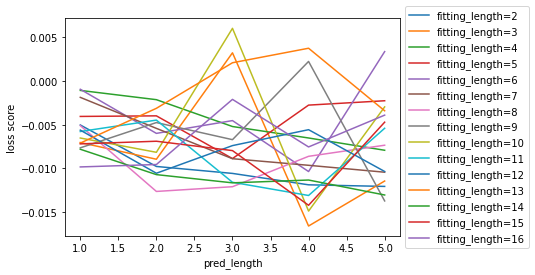

In [36]:
fig, ax = plt.subplots()
# for k in loss_score_dict.keys():
#     ax.plot(pred_length_list, loss_score_dict[k],label=k)
for k in range(2,17):
    ax.plot(pred_length_list, loss_score_dict[k],label="fitting_length="+str(k))
ax.set_xlabel('pred_length')
ax.set_ylabel('loss score')

#plt.yscale('log') 
ax.legend(loc='right', bbox_to_anchor=(1.4, 0.5))
plt.savefig('ex4.png')
plt.show()

In [16]:
start_time = "2013-04-01 00:00:00"
end_time = "2016-01-01 00:00:00"

start=util.convert_time_into_datetime(time=start_time)
end = util.convert_time_into_datetime(time=end_time)

In [38]:
fitting_windows_list=range(2,18,1)
pred_length_list=range(1,6,1)

loss_score_dict={}
for fitting_windows in fitting_windows_list:
    loss_score_list=[]
    for pred_length in pred_length_list:
        dpp2 = gp_wrapper_portfolio.gp_wrapper_portfolio(data_file_portfolio=data_file_portfolio, data_file_return=data_file_return,GP_type="VGP")
        df_pred_profit, df_actual_profit, df_score = dpp2.predict_multi_times_different_pred_length(start_time=start,
                                        end_time=end,fitting_windows=fitting_windows,match_different_timepoint=False,pred_length=pred_length)
        print("fitting_windows is :",fitting_windows)
        print("pred_length is :",pred_length)
        print("average predicted profit :",np.mean(df_pred_profit["Profit"]))
        print("average actual profit :", np.mean(df_actual_profit["Profit"]))
        print("average score :", np.mean(df_score))
        print("cumulative predicted profit :", (util.compute_cumulative_profit(df_pred_profit)))
        print("cumulative actual profit :", (util.compute_cumulative_profit(df_actual_profit)))
        print("cumulative score :", (util.compute_cumulative_profit(df_pred_profit))-util.compute_cumulative_profit(df_actual_profit))
        loss_score_list.append(np.mean(df_score))
    loss_score_dict[fitting_windows]=loss_score_list

fitting_windows is : 16
average predicted profit : 0.02665525287034726
average actual profit : 0.035121118141947086
average score : -0.008465865271599827
cumulative predicted profit : 4.739853564354177
cumulative actual profit : 7.7277132395488275
cumulative score : -2.9878596751946507
fitting_windows is : 19
average predicted profit : 0.030148520942430673
average actual profit : 0.036658784897420714
average score : -0.006510263954990046
cumulative predicted profit : 5.482832479251038
cumulative actual profit : 7.739820436330542
cumulative score : -2.256987957079504
fitting_windows is : 22
average predicted profit : 0.027800003628870397
average actual profit : 0.03670409482443442
average score : -0.008904091195564017
cumulative predicted profit : 4.433103525411151
cumulative actual profit : 7.034989936392595
cumulative score : -2.601886410981444
fitting_windows is : 25
average predicted profit : 0.0253731020157366
average actual profit : 0.03548309732419352
average score : -0.010109995

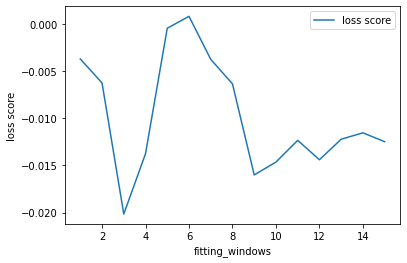

In [18]:
fig, ax = plt.subplots()

ax.plot(fitting_windows_list, loss_score_list2,label="loss score")

ax.set_xlabel('fitting_windows')
ax.set_ylabel('loss score')
#plt.yscale("log")
ax.legend()
plt.savefig('ex3_fitting_windows.png')
plt.show()

In [19]:
start_time = "2010-04-01 00:00:00"
end_time = "2017-01-01 00:00:00"

start=util.convert_time_into_datetime(time=start_time)
end = util.convert_time_into_datetime(time=end_time)

In [20]:
fitting_windows_list3=range(20,60,5)
loss_score_list3=[]

for fitting_windows in fitting_windows_list3:
    dpp2 = gp_wrapper_portfolio.gp_wrapper_portfolio(data_file_portfolio=data_file_portfolio, data_file_return=data_file_return,GP_type="VGP")
    df_pred_profit, df_actual_profit, df_score = dpp2.predict_multi_times(start_time=start, end_time=end,fitting_windows=fitting_windows,match_different_timepoint=False)
    print("fitting_windows is :",fitting_windows)
    print("average predicted profit :",np.mean(df_pred_profit["Profit"]))
    print("average actual profit :", np.mean(df_actual_profit["Profit"]))
    print("average score :", np.mean(df_score))
    loss_score_list3.append(np.mean(df_score))
    print("cumulative predicted profit :", (util.compute_cumulative_profit(df_pred_profit)))
    print("cumulative actual profit :", (util.compute_cumulative_profit(df_actual_profit)))
    print("cumulative score :", (util.compute_cumulative_profit(df_pred_profit))-util.compute_cumulative_profit(df_actual_profit))


fitting_windows is : 20
average predicted profit : 0.028592885971700364
average actual profit : 0.03723037795204808
average score : -0.008637491980347722
cumulative predicted profit : 4.893008976045623
cumulative actual profit : 7.734805015066793
cumulative score : -2.84179603902117
fitting_windows is : 25
average predicted profit : 0.0253731020157366
average actual profit : 0.03548309732419352
average score : -0.010109995308456908
cumulative predicted profit : 3.615374515827257
cumulative actual profit : 5.9611543847185215
cumulative score : -2.3457798688912646
fitting_windows is : 30
average predicted profit : 0.03378698186920381
average actual profit : 0.03812078274613127
average score : -0.00433380087692747
cumulative predicted profit : 4.874093166518699
cumulative actual profit : 5.7780113584076265
cumulative score : -0.9039181918889279
fitting_windows is : 35
average predicted profit : 0.04096480719487816
average actual profit : 0.04557316166409575
average score : -0.004608354469

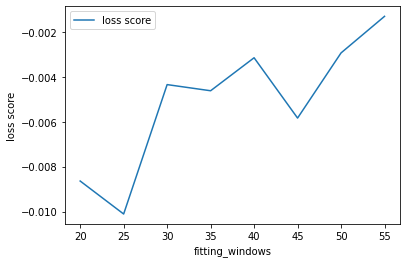

In [21]:
fig, ax = plt.subplots()

ax.plot(fitting_windows_list3, loss_score_list3,label="loss score")

ax.set_xlabel('fitting_windows')
ax.set_ylabel('loss score')
#plt.yscale("log")
ax.legend()
#plt.savefig('ex3_fitting_windows_2.png')
plt.show()